
# ⭐ 1️⃣ Why Linear Regression Fails for Classification

Suppose we want to predict:

| Hours | Pass(1) / Fail(0) |
| ----- | ----------------- |
| 1     | 0                 |
| 2     | 0                 |
| 3     | 0                 |
| 4     | 1                 |
| 5     | 1                 |

Linear regression equation would be:

[
y = mx + c
]

But the problem:

❌ It can give values like −1, 1.3, 2.1, 10 etc.
❌ These are invalid probabilities.
❌ Threshold becomes unreliable.

So we need something that:

✔ Converts all outputs between **0 to 1**
✔ Can be interpreted as **probability**

That is where **sigmoid** comes.

---

# ⭐ 2️⃣ Why Logistic Regression Uses Sigmoid

Sigmoid squeezes any number into 0→1 range:

[
\sigma(z)=\frac{1}{1+e^{-z}}
]

### What is "z"?

[
z = w_1x_1 + w_2x_2 + ... + b
]

This is the **same linear equation** as linear regression.

But instead of giving output directly, we pass it to sigmoid:

[
p = \sigma(z)
]

And now p = probability → 0 ≤ p ≤ 1

---

# ⭐ 3️⃣ Logistic Regression Final Formula

[
p = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}
]

This is logistic regression.

So logistic regression =
**Linear regression + Sigmoid + Probability interpretation**

---

# ⭐ 4️⃣ Probability → Class Conversion

If p ≥ 0.5 → Class 1
If p < 0.5 → Class 0

Why 0.5?
Because sigmoid(0) = 0.5

So the **decision boundary** is:

[
w_1x_1 + w_2x_2 + b = 0
]

---

# ⭐ 5️⃣ Why Decision Boundary Is a Straight Line?

Because boundary is formed when:

[
p = 0.5 \Rightarrow z = 0
]

So:

[
w_1x_1 + w_2x_2 + b = 0
]

This is:

* Linear equation in 2D → straight line
* Linear equation in 3D → plane
* Linear in nD → hyperplane

This is why logistic regression is a **linear classifier**.

---

# ⭐ 6️⃣ Mathematical Intuition of Training (How model learns)

Logistic regression does NOT use MSE (mean squared error).
Why?

Because sigmoid + MSE makes optimization unstable.

So logistic regression uses **Log Loss / Cross Entropy**:

[
Loss = -[y\log(p) + (1-y)\log(1-p)]
]

### Case 1: y = 1

Loss = -log(p)
Higher probability → lower loss
Lower probability → very high loss

### Case 2: y = 0

Loss = -log(1-p)

### Meaning

* If model predicts correct class → low loss
* If prediction is confident but wrong → huge loss
  (This forces model to correct itself)

---

# ⭐ 7️⃣ Gradient Descent (How weights change)

Weights update rule:

[
w := w - \alpha \cdot \frac{\partial Loss}{\partial w}
]

For logistic regression:

[
\frac{\partial Loss}{\partial w} = (p - y)x
]

So:
✔ If model predicts higher than true value → weight decreases
✔ If model predicts lower than true value → weight increases

This continues until loss becomes minimum.

---

# ⭐ 8️⃣ Full Mathematical Flow (Simple Summary)

### Step 1 → Linear combination

[
z = w_1x_1 + w_2x_2 + ... + b
]

### Step 2 → Convert to probability

[
p = \sigma(z)
]

### Step 3 → Calculate log-loss

[
Loss = -[y\log(p) + (1-y)\log(1-p)]
]

### Step 4 → Adjust weights using gradient descent

[
w := w - \alpha(p - y)x
]

### Step 5 → Repeat until loss is minimum

---

# ⭐ 9️⃣ Tiny Numerical Example (Very Easy)

Suppose:

x = 2
y_true = 1
w = 0.5
b = 0

### Step 1: Linear part

[
z = 0.5 \times 2 = 1
]

### Step 2: Sigmoid

[
p = \frac{1}{1+e^{-1}} = 0.73
]

### Step 3: Log loss

[
Loss = -\log(0.73) = 0.315
]

### Step 4: Gradient

[
gradient = (p - y)x = (0.73 - 1)\times 2 = -0.54
]

### Step 5: Update weight

[
w_{new} = w - 0.1(-0.54) = 0.554
]

✔ Weight increased because prediction was lower than true value

This is how logistic regression learns internally.

---





## 1) Model & notation (quick)

* Input (x) (can be vector (\mathbf{x})); weights (\mathbf{w}); bias (b).
* Linear score: (z = \mathbf{w}^\top \mathbf{x} + b).
* Sigmoid (probability of class 1):
  [
  \sigma(z)=\frac{1}{1+e^{-z}} \quad\text{so}\quad p=\sigma(z)
  ]

We predict class 1 if (p\ge 0.5) (i.e. (z\ge0)).

---

## 2) Loss function (why cross-entropy)

For a single example ((\mathbf{x},y)) with (y\in{0,1}), the negative log-likelihood (binary cross-entropy) is:
[
\ell(\mathbf{w},b)= -\big[y\log p + (1-y)\log(1-p)\big]
]
This penalizes confident wrong predictions heavily (good property).

For (N) examples, loss (L=\frac{1}{N}\sum_i \ell_i).

---

## 3) Gradient (key step — how weights update)

We need (\frac{\partial \ell}{\partial \mathbf{w}}) and (\frac{\partial \ell}{\partial b}).

Using (p=\sigma(z)) and derivative (\sigma'(z)=\sigma(z)(1-\sigma(z))), the vectorized gradient simplifies nicely:

[
\frac{\partial \ell}{\partial \mathbf{w}} = (p - y)\mathbf{x}
\qquad
\frac{\partial \ell}{\partial b} = (p - y)
]

For the full dataset (average over (i)):
[
\nabla_{\mathbf{w}} L = \frac{1}{N}\sum_{i}(p_i - y_i)\mathbf{x}*i
\qquad
\nabla*{b} L = \frac{1}{N}\sum_{i}(p_i - y_i)
]

**Interpretation:** error term ((p-y)) scales the input — if model predicts too large probability for class 1, (p-y>0) and gradient reduces weights in that direction.

---

## 4) Gradient descent update

With learning rate (\alpha):
[
\mathbf{w} \leftarrow \mathbf{w} - \alpha,\nabla_{\mathbf{w}}L
\qquad
b \leftarrow b - \alpha,\nabla_b L
]

---

## 5) Worked numeric example (single feature)

Dataset: (x) = hours studied. Take one sample (x=5), label (y=1). Initialize (w=0.2,\ b=-1.0).
Compute one gradient step.

1. Linear score:
   [
   z = w x + b = 0.2\times5 -1.0 = 0.0
   ]
2. Sigmoid:
   [
   p=\sigma(0)=0.5
   ]
3. Loss (single example):
   [
   \ell = -[1\cdot\log 0.5 + 0\cdot\log(0.5)] = -\log 0.5 \approx 0.6931
   ]
4. Gradients:
   [
   \frac{\partial \ell}{\partial w} = (p-y)x = (0.5-1)\times5 = -2.5
   ]
   [
   \frac{\partial \ell}{\partial b} = (p-y) = -0.5
   ]
5. Update (take (\alpha=0.1)):
   [
   w_{\text{new}} = 0.2 - 0.1\times(-2.5) = 0.2 + 0.25 = 0.45
   ]
   [
   b_{\text{new}} = -1.0 - 0.1\times(-0.5) = -1.0 + 0.05 = -0.95
   ]

Now model is more confident (higher (w)) toward predicting class 1 for larger (x).

---

## 6) Why this works intuitively

* If (p>y) (model overestimates class 1) → (p-y>0) → gradient increases in direction that *reduces* (z) for that (\mathbf{x}) (weights step down).
* If (p<y) (model underestimates) → (p-y<0) → gradient increases weights to boost (z).

Cross-entropy + sigmoid gives this linear simple gradient ((p-y)\mathbf{x}) which is numerically stable.

---

## 7) Decision boundary (again)

Boundary where (p=0.5) ⇔ (z=0) ⇔ (\mathbf{w}^\top \mathbf{x}+b=0). This is a **hyperplane** (line in 2D).

---

## 8) Quick comparison with linear regression (math point)

* Linear regression minimizes squared error; its gradient is ((\hat y - y)\mathbf{x}) where (\hat y) is the predicted real value. For classification that’s bad because (\hat y) can be outside [0,1] and MSE is not appropriate for probabilities.
* Logistic uses sigmoid + cross-entropy, leading to a probabilistic output and the neat gradient ((p-y)\mathbf{x}).

---

## 9) Short runnable code: gradient descent for logistic on small dataset

Run this to see loss decreasing and weight updates (paste into a notebook):

```python
import numpy as np
import matplotlib.pyplot as plt

# tiny dataset (hours, label)
X = np.array([[1],[2],[3],[4],[5],[6]], dtype=float)
y = np.array([0,0,0,1,1,1], dtype=float)

def sigmoid(z): return 1/(1+np.exp(-z))

# init
w = 0.0
b = 0.0
lr = 0.1
epochs = 100
losses = []

for _ in range(epochs):
    z = X.dot(w) + b             # shape (N,1)
    p = sigmoid(z).flatten()     # predictions
    loss = -np.mean(y*np.log(p+1e-9) + (1-y)*np.log(1-p+1e-9))
    losses.append(loss)
    # gradients (vectorized)
    error = (p - y)              # shape (N,)
    dw = np.mean(error * X.flatten())
    db = np.mean(error)
    # update
    w -= lr * dw
    b -= lr * db

print("w, b:", w, b)
plt.plot(losses); plt.xlabel("epoch"); plt.ylabel("loss"); plt.show()
```

This shows the loss curve and final weights — you’ll see loss drop and weights change toward a separator.

---

## 10) Final short checklist (what to remember)

* Sigmoid maps linear score (z) → probability (p).
* Loss = cross-entropy; gradient = ((p-y)\mathbf{x}).
* Update weights with gradient descent; decision boundary where (z=0).
* Logistic = regression on probability + threshold → classification.
* Works best when classes are (roughly) linearly separable in feature space.

---









w, b: 0.5344777864380225 -1.3276086113737608


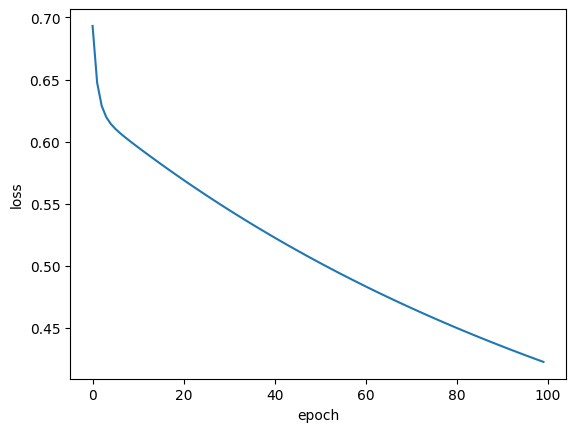

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# tiny dataset (hours, label)
X = np.array([[1],[2],[3],[4],[5],[6]], dtype=float)
y = np.array([0,0,0,1,1,1], dtype=float)

def sigmoid(z): return 1/(1+np.exp(-z))

# init
w = 0.0
b = 0.0
lr = 0.1
epochs = 100
losses = []

for _ in range(epochs):
    z = X.dot(w) + b             # shape (N,1)
    p = sigmoid(z).flatten()     # predictions
    loss = -np.mean(y*np.log(p+1e-9) + (1-y)*np.log(1-p+1e-9))
    losses.append(loss)
    # gradients (vectorized)
    error = (p - y)              # shape (N,)
    dw = np.mean(error * X.flatten())
    db = np.mean(error)
    # update
    w -= lr * dw
    b -= lr * db

print("w, b:", w, b)
plt.plot(losses); plt.xlabel("epoch"); plt.ylabel("loss"); plt.show()
